In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
def load_clients(filename):

    with open(filename, 'rb') as fp:
        clients = pickle.load(fp)
    print("client size: ", len(clients))
    
    distribution = {}
    for client in clients:
        distribution[client] = distribution.get(client, 0) + 1

    distribution = sorted(distribution.items(), key=lambda x: -x[-1])
    x = np.array([i[0] for i in distribution])
    y = np.array([i[1] for i in distribution])
    print("distinct clients: ",len(x))
    print("var: ", np.var(y))
    return x, y

In [4]:
def savefig_word_distribution(x, y, topk=50):
    x_top = x[:topk]
    y_top = y[:topk]
    total_clients = np.sum(y)
    with plt.style.context("seaborn"):
        plt.xticks(rotation=90)
        
        plt.xlabel("words")
        plt.ylabel("word_counts")
        plt.title("Words Count Distribution")
        plt.plot(x_top, y_top, '^-')
        plt.savefig(f"./clients_{total_clients}.png", format="png")


In [5]:
x, y = load_clients("./zipf_remove_top5_1989.txt")
savefig_word_distribution(x, y, topk=50)



client size:  1989
distinct clients:  234
var/client:  12.585552268244577


: 

In [5]:
x, y = load_clients("./triehh_clients_remove_top5_90740.txt")
savefig_word_distribution(x, y, topk=50)

client size:  90740
distinct clients:  15737
var/client:  0.06305916690756608


## Generate Zipf Distribution dataset

In [8]:
import numpy as np
import pandas as pd

a = np.random.zipf(1.5, 2200)                                            


with open("./triehh_clients_remove_top5_90740.txt", 'rb') as f:
    data = pickle.load(f) 

k = np.bincount(a)[1:]

value_counts = pd.value_counts(data)

value_counts.sort_values(ascending=False)

clients = []
rank = 0
for item in value_counts.keys():
    clients += [item]*k[rank]
    rank += 1

np.random.shuffle(clients)
n = len(clients)

with open(f"./zipf_{n}.txt", 'wb') as f:
    pickle.dump(clients, f)


## Generate Poisson distribution dataset

In [ ]:
import numpy as np

import pandas as pd

a = np.random.poisson(100, 2000)                                            


with open("./triehh_clients_remove_top5_90740.txt", 'rb') as f:
    data = pickle.load(f) 

k = np.bincount(a)[1:]

value_counts = pd.value_counts(data)

value_counts.sort_values(ascending=False)

clients = []
rank = 0
for item in value_counts.keys():
    clients += [item]*k[rank]
    rank += 1

np.random.shuffle(clients)

with open("./zipf_remove_top5_20000.txt", 'wb') as f:
    pickle.dump(clients, f)


In [ ]:
mechanism = ['fedft', 'wtrie', 'triehh','pem']
color = ["blue","orange", "green",  "red"]
score = 'F1'
connectionloss = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
dir = ["../results/connectionloss_99411/", "../results/connectionloss_90740/"]
plt.figure()
for clsr in connectionloss:
    for inx, mc in enumerate(mechanism):
        filename = f"{mechanism}_cls{clsr}_F1"
        col = color[inx]
        

## Generate Numeric Dataset
> https://www.kaggle.com/datasets/ahmedsowah/fitbit-fitness-data (dailySteps_merged.csv)

In [78]:
import pandas as pd
import pickle
import os 
import time
import matplotlib.pyplot as plt

In [4]:
steps_df = pd.read_csv("./dailySteps_merged.csv")

In [5]:
steps_df.describe()

,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


In [6]:
steps_df.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [7]:
steps_df.ActivityDay.unique()

array(['4/12/2016', '4/13/2016', '4/14/2016', '4/15/2016', '4/16/2016',
       '4/17/2016', '4/18/2016', '4/19/2016', '4/20/2016', '4/21/2016',
       '4/22/2016', '4/23/2016', '4/24/2016', '4/25/2016', '4/26/2016',
       '4/27/2016', '4/28/2016', '4/29/2016', '4/30/2016', '5/1/2016',
       '5/2/2016', '5/3/2016', '5/4/2016', '5/5/2016', '5/6/2016',
       '5/7/2016', '5/8/2016', '5/9/2016', '5/10/2016', '5/11/2016',
       '5/12/2016'], dtype=object)

In [8]:
specific_date = '4/24/2016'
filter_df = (steps_df.loc[steps_df.ActivityDay == specific_date])

[12. 10.  5.  4.  1.] [    0.   4597.6  9195.2 13792.8 18390.4 22988. ]


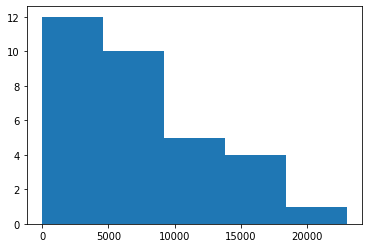

In [56]:
from random import randint


distribution_p = filter_df.StepTotal/filter_df.StepTotal.sum()

counts, bins, _ = plt.hist(filter_df.StepTotal, bins=5)
print(counts, bins)
counts_p = counts/counts.sum()


In [51]:
bins = filter_df.StepTotal
print(bins)


12     10039
43      6076
74      3321
104        0
135     2090
166    13481
197     3490
228     4165
259     9471
277     6873
308     6731
328    14112
358        0
393     4081
424    10243
455     5002
486     8563
517    15050
548     1807
579    15764
609     7623
637     5896
666     2153
692     5029
723    11085
749     3520
780    22988
811     8905
830     3703
861     8286
892      400
921    16674
Name: StepTotal, dtype: int64


In [72]:

def gen_samples(n, bins):
    synthetic_list = []
    for j in range(n):
        choice_list = [randint(int(bins[i]), int(bins[i+1])+1) for i in range(len(bins)-1)]
        synthetic_list.append(np.random.choice(choice_list, p=counts_p))
    return synthetic_list


(array([348., 358., 323., 326., 173., 180., 119., 113.,  30.,  30.]),
 array([3.00000e+00, 2.29190e+03, 4.58080e+03, 6.86970e+03, 9.15860e+03,
        1.14475e+04, 1.37364e+04, 1.60253e+04, 1.83142e+04, 2.06031e+04,
        2.28920e+04]),
 <BarContainer object of 10 artists>)

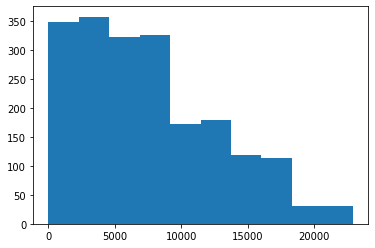

In [74]:
gen_SC = gen_samples(2000, bins)
plt.hist(gen_SC)

In [86]:
binary_data = [bin(i) for i in gen_SC]

In [88]:
binary_data[:10]

['0b10001000100100',
 '0b10000111101110',
 '0b1101010100101',
 '0b101011110100101',
 '0b101001010100',
 '0b1011001011101',
 '0b11110110',
 '0b110111110101',
 '0b100001000101001',
 '0b10100110000000']

In [89]:
gen_SC[:10]

[8740, 8686, 6821, 22437, 2644, 5725, 246, 3573, 16937, 10624]

In [80]:
with open("synthetic_steps.txt", 'wb') as f:
    pickle.dump(gen_SC, f)

In [85]:
type(gen_SC)

list